# Tugas 1

1. Buatlah model klasifikasi dengan menggunakan kNN untuk mengklasifikasikan jenis suara male dan female pada dataset voice.csv.
2. Lakukan percobaan untuk mengetahui fitur-fitur yang paling optimal untuk digunakan. Fitur apa saja yang Anda gunakan untuk mendapatkan hasil terbaik?
3. Berdasarkan fitur yang telah Anda pilih pada soal nomor 2, berapa nilai  yang terbaik? Lampirkan grafika analisis dan alasan Anda.

**Import Libary**

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**Load Dataset**

In [20]:
df = pd.read_csv('E:\\kuliah\\smt5\\machine-learning\\voice.csv')
print("Data Awal:")
df.head()
df.info()

Data Awal:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-

**Eksplorasi Data**

In [21]:
print("\Jumlah data per label:")
print(df['label'].value_counts())

print("\nStatistik deskriptif:")
df.describe()

\Jumlah data per label:
label
male      1584
female    1584
Name: count, dtype: int64

Statistik deskriptif:


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


**Visualisasi sederhana distribusi beberapa fitur**

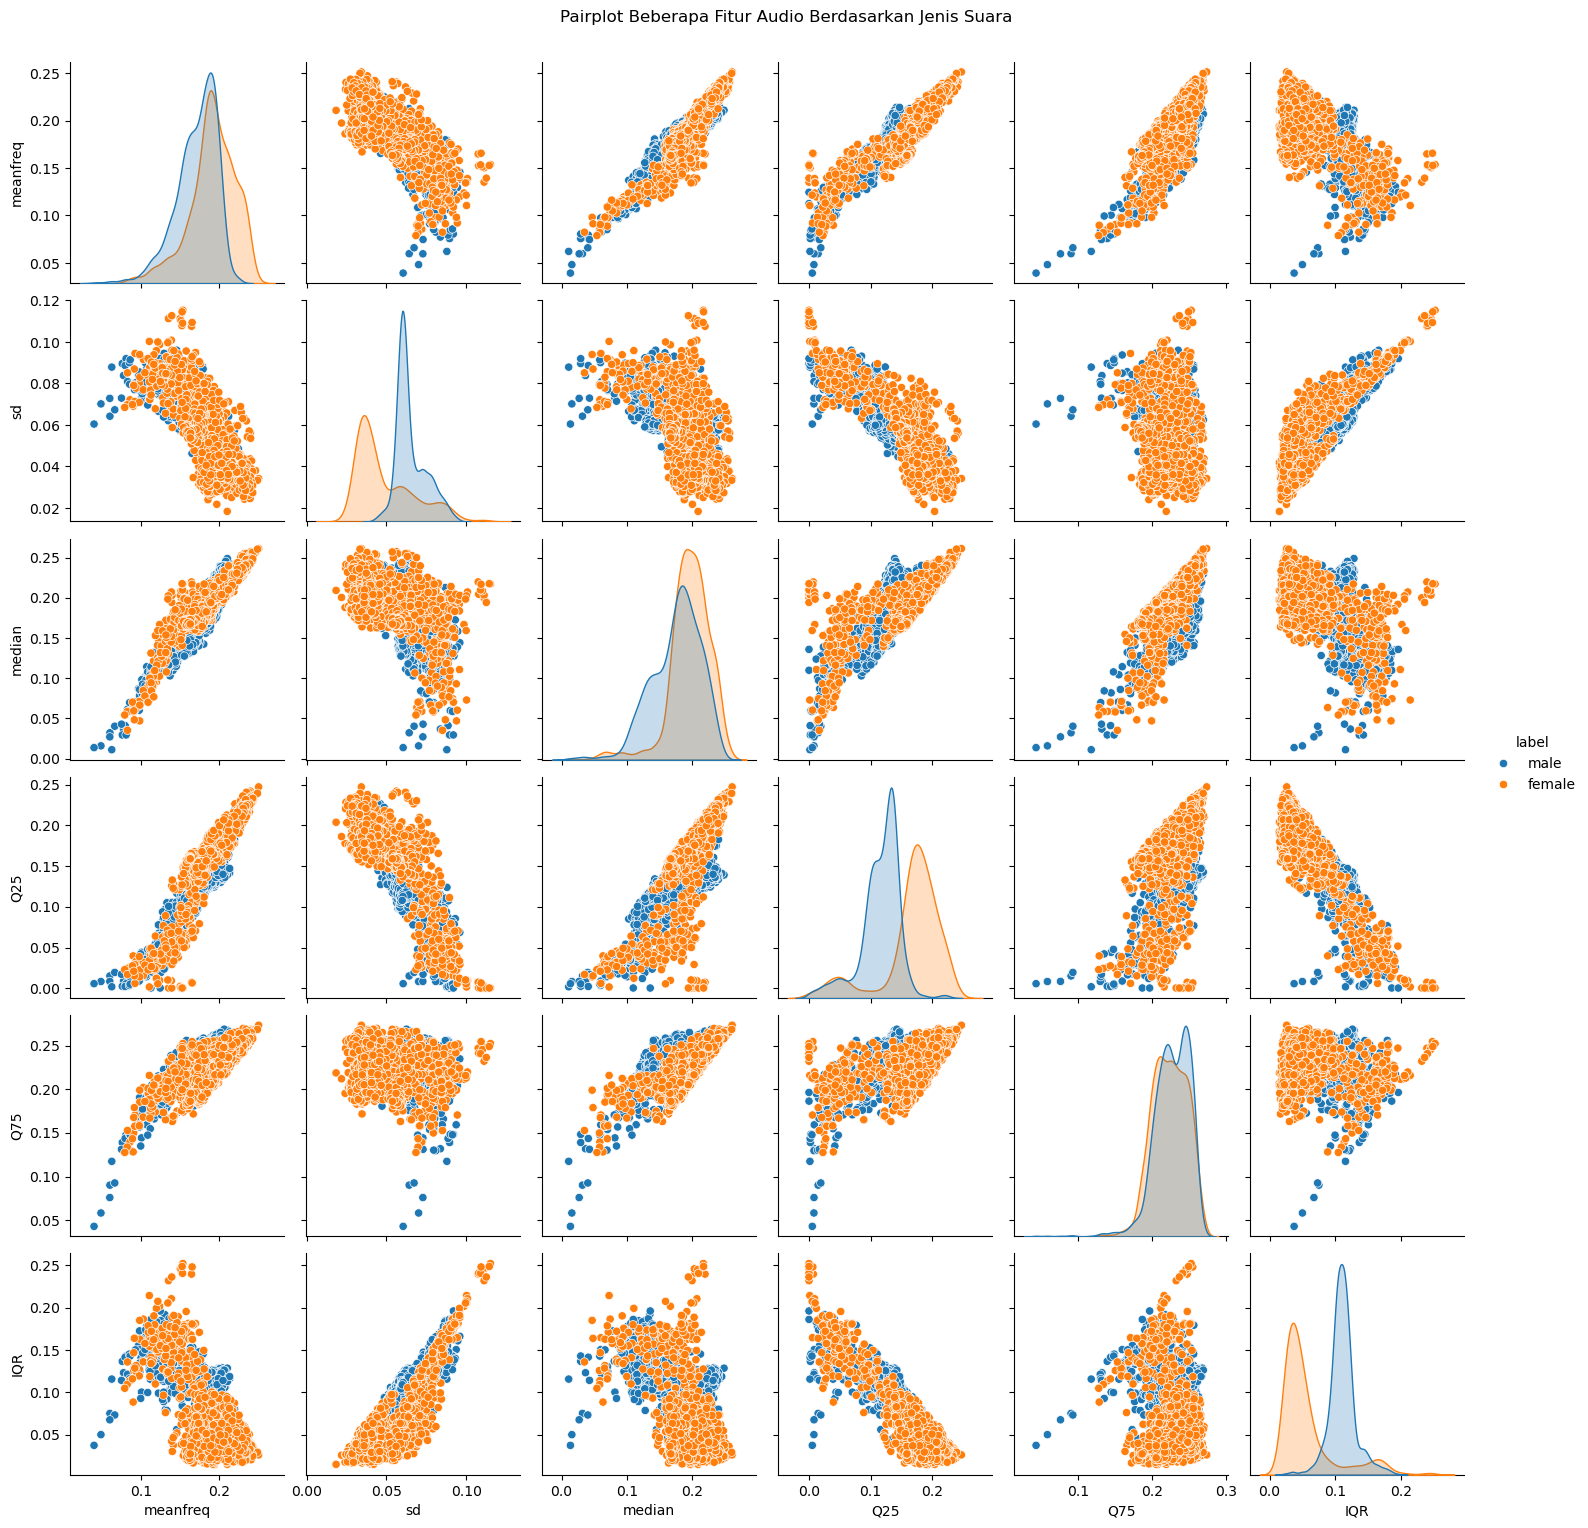

In [22]:
sns.pairplot(df[['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'label']], hue='label')
plt.suptitle('Pairplot Beberapa Fitur Audio Berdasarkan Jenis Suara', y=1.02)
plt.show()

**Preprocessing Data**

In [23]:
# Pisahkan fitur (X) dan label (y)
X = df.drop('label', axis=1)
y = df['label']

# Encode label (male=0, female=1)
y = y.map({'male': 0, 'female': 1})

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### kNN Model

In [36]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Hasil Klasifikasi (KNN - Semua Fitur)")
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))
print("Akurasi:", accuracy_score(y_test, y_pred))

Hasil Klasifikasi (KNN - Semua Fitur)
Confusion Matrix:
 [[331   6]
 [  5 292]]
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       337
           1       0.98      0.98      0.98       297

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634

Akurasi: 0.9826498422712934


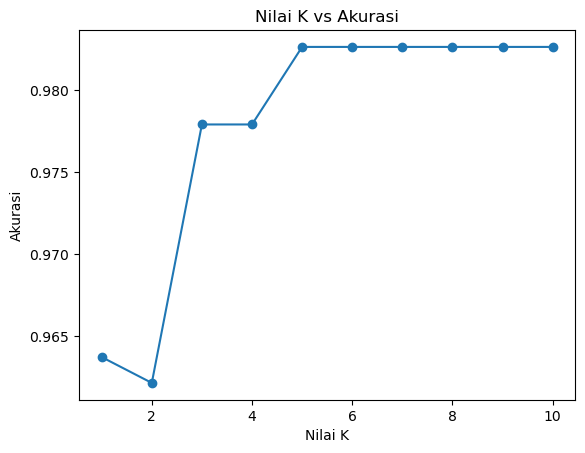

In [37]:
# Evaluasi setiap k

acc = []
for k in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    acc.append(model.score(X_test, y_test))

plt.plot(range(1, 11), acc, marker='o')
plt.title('Nilai K vs Akurasi')
plt.xlabel('Nilai K')
plt.ylabel('Akurasi')
plt.show()

Nilai K terbaik pada nilai 5 (Nilai memuncak di nilai 5 ke atas)

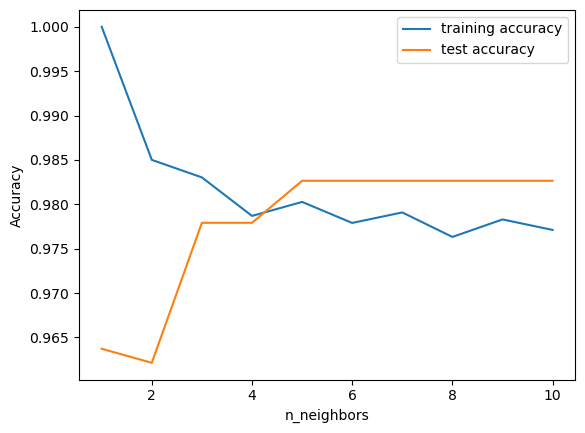

In [38]:
# Perbandingan akurasi
train_acc = []
test_acc = []

for k in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_acc.append(model.score(X_train, y_train))
    test_acc.append(model.score(X_test, y_test))

plt.plot(range(1, 11), train_acc, label='training accuracy')
plt.plot(range(1, 11), test_acc, label='test accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


### Eksperimen Fitur

In [39]:
# Menggunakan fitur terpilih
fitur_terpilih = ['meanfreq', 'median', 'IQR', 'skew', 'centroid', 'meanfun']

X_selected = df[fitur_terpilih]
y = df['label'].map({'male': 0, 'female': 1})

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X_train, y_train)
y_pred2 = knn2.predict(X_test)

print("\nHasil Klasifikasi (KNN - Fitur Terpilih)")
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))
print(f"Akurasi (fitur terpilih): {accuracy_score(y_test, y_pred2)}")



Hasil Klasifikasi (KNN - Fitur Terpilih)
[[331   6]
 [  5 292]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       337
           1       0.98      0.98      0.98       297

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634

Akurasi (fitur terpilih): 0.9826498422712934


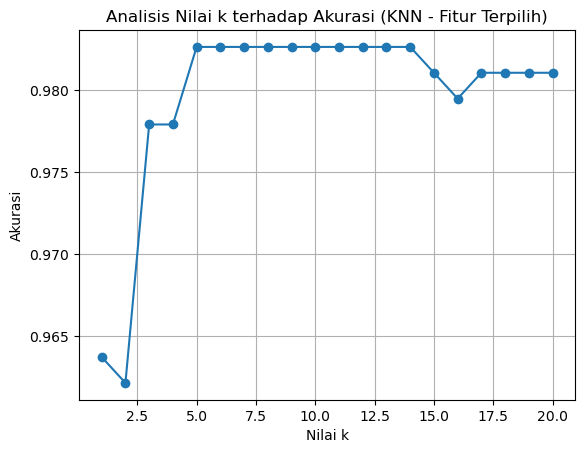

Nilai k terbaik: 5 dengan akurasi 0.9826498422712934


In [33]:
# Analisis nilai k dengan fitur terpilih

k_values = range(1, 21)
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred_k = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred_k)
    accuracies.append(acc)

plt.plot(k_values, accuracies, marker='o')
plt.title('Analisis Nilai k terhadap Akurasi (KNN - Fitur Terpilih)')
plt.xlabel('Nilai k')
plt.ylabel('Akurasi')
plt.grid(True)
plt.show()

# Cetak nilai k dengan akurasi tertinggi
best_k = k_values[np.argmax(accuracies)]
best_acc = max(accuracies)
print(f"Nilai k terbaik: {best_k} dengan akurasi {best_acc}")